# <center> Случайный лес. Практика

Данные содержат 23 признака и 145 460 наблюдений. Из этих 23 признаков шесть — категориальные, в одном записана дата, а остальные являются непрерывными числовыми данными.

- Примеры числовых признаков: температура, скорость ветра, влажность, облачность, атмосферное давление в разное время суток, количество осадков, испарение, количество часов с солнечной погодой.
- Примеры категориальных признаков: местоположение, направление ветра в разное время суток, наличие дождя сегодня или завтра.

**<center> Признаки**

- Date — дата, в которую зафиксировано наблюдение;
- Location — местонахождение метеорологической станции;
- MinTemp — минимальная температура (℃);
- MaxTemp — максимальная температура (℃);
- Rainfall — количество осадков (дождь) за сутки (мм);
- Evaporation — количество испарений до 9 утра (мм);
- Sunshine — количество часов в сутках, когда светило солнце;
- WindGustDir — направление самого сильного порыва ветра за последние 24 часа;
- WindGustSpeed — скорость самого сильного порыва ветра за последние 24 часа;
- WindDir9am — направление ветра в 9 утра;
- WindDir3pm — направление ветра в 3 часа дня;
- WindSpeed9am — скорость ветра в 9 часов утра;
- WindSpeed3pm — скорость ветра в 3 часа дня;
- Humidity9am — влажность в 9 утра;
- Humidity3pm — влажность в 3 часа дня;
- Pressure9am — атмосферное давление в 9 утра;
- Pressure3pm — атмосферное давление в 3 часа дня;
- Cloud9am — часть неба, закрытая облаками, в 9 утра;
- Cloud3pm — часть неба, закрытая облаками, в 3 часа дня;
- Temp9am — температура в 9 утра;
- Temp3pm — температура в 3 часа дня;
- RainToday — наличие дождя в этот день;
- RainTomorrow — наличие дождя на следующий день.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [58]:
# upload a dataset
data = pd.read_csv('data/weatherAUS.csv')
display(data.head())

# Суммарное количество пропусков
display(data.isnull().sum().sum())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


343248

In [59]:
# Summury non pos >40%
display((data.isna().sum()/len(data)* 100).sort_values(ascending=False))

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

In [60]:
# Удалим признаки в которых больше 40% пропусков
# создадим копию данных
drop_data = data.copy()
# зададим минимальный порог: вычисляем 60% от числа строк
thresh = drop_data.shape[0] * 0.6
# удаляем столбцы где количество пропусков больше 40% (т.е. 100-60 = thresh)
drop_data = drop_data.dropna(thresh=thresh, axis=1)
drop_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [61]:
# заменим значения на 0 и 1

drop_data.RainToday = drop_data.RainToday.map({'No': 0, 'Yes': 1})
drop_data.RainTomorrow = drop_data.RainTomorrow.map({'No': 0, 'Yes': 1})

display(drop_data['RainToday'].isnull().sum())
display(round(drop_data['RainToday'].mean(), 2))


3261

0.22

Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца). Изначальный признак Date удалите. Определите, какой месяц имеет самую большую часть дождливых дней относительно всех дней месяца. В качестве ответа введите порядковый номер месяца.

In [62]:
# Преобразуем признак Date в формать Datetime
drop_data['Date'] = pd.to_datetime(drop_data['Date'], format='%Y-%m-%d')

# Выделим месяц в отдельный признак
drop_data['Month'] = drop_data['Date'].dt.month

#Удалим признак DAte
drop_data.drop('Date', axis = 1, inplace = True)
df_season = drop_data.groupby('Month').mean(numeric_only=True)
df_season[['RainToday']]

,RainToday
Month,
1,0.189484
2,0.206746
3,0.217135
4,0.216845
5,0.222163
6,0.263638
7,0.270736
8,0.253167
9,0.229135


Обработайте оставшиеся категориальные признаки. С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент.

Кодировку признаков важно выполнить именно в следующем порядке: categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']. Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, который мы будем использовать в дальнейшем, чувствителен к порядку столбцов. Аргумент categoricals передаётся в функцию pd.get_dummies() с использованием ключевого слова columns, а именно columns=categoricals.

Сколько теперь признаков в данных, если считать целевую переменную?

In [66]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

dummy_data = pd.get_dummies(data=drop_data, columns=categoricals)

dummy_data.shape

(145460, 124)

In [67]:
dummy_data.dropna(inplace=True)
X = dummy_data.drop('RainTomorrow', axis = 1)
y = dummy_data['RainTomorrow']  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state = 31)
y_test.mean()

0.22770253002811142

Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную».

Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp). Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка. Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки. Случайность фиксируйте с помощью np.random.seed(31).

In [70]:
def gbs(data, n):     
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers
target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
print(round(np.std(mean_values), 2)) #находим для них стандартное отклонение

0.03


Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее.

В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [71]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicitions
y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)

print(f'ROC_AUC train score: {round(metrics.roc_auc_score(y_train, y_train_pred_lr), 2)}')

print(f'ROC_AUC test score: {round(metrics.roc_auc_score(y_test, y_test_pred_lr), 2)}')

ROC_AUC train score: 0.73
ROC_AUC test score: 0.73


c:\Users\Павел\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:

```python
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}

``````
Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию.

In [72]:
params = {
    'max_leaf_nodes': list(range(2, 10)), 
    'min_samples_split': [2, 3, 4], 
    'max_depth': [5,7,9,11]
}

# подберите оптимальные параметры с помощью gridsearch

grid_search_tree = model_selection.GridSearchCV(tree.DecisionTreeClassifier(random_state=42), 
                        params,
                        verbose=3,
                        cv=3,  
)
%time 
grid_search_tree.fit(X_train, y_train) 

print(grid_search_tree.best_params_)


CPU times: total: 0 ns
Wall time: 0 ns
Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.817 total time=   0.2s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.820 total time=   0.1s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.825 total time=   0.1s
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.817 total time=   0.1s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.820 total time=   0.1s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.825 total time=   0.1s
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.817 total time=   0.1s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.820 total time=   0.1s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.825 total time=   0.1s
[CV 1/3] END max_depth=5, 

In [76]:
cv_best_param = tree.DecisionTreeClassifier(
    max_depth=5,
    max_leaf_nodes=9,
    min_samples_split=2,
    random_state=42
)
cv_best_param.fit(X_train, y_train)

# Predicitions
y_train_pred_cv = cv_best_param.predict(X_train)
y_test_pred_cv = cv_best_param.predict(X_test)

print(f'ROC_AUC train score: {round(metrics.roc_auc_score(y_train, y_train_pred_cv), 2)}')

print(f'ROC_AUC test score: {round(metrics.roc_auc_score(y_test, y_test_pred_cv), 2)}')

ROC_AUC train score: 0.7
ROC_AUC test score: 0.7


K сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию.

Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [79]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=31)

rf.fit(X_train, y_train)

# Predicitions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print(f'ROC_AUC train score: {round(metrics.roc_auc_score(y_train, y_train_pred_rf), 2)}')

print(f'ROC_AUC test score: {round(metrics.roc_auc_score(y_test, y_test_pred_rf), 2)}')

ROC_AUC train score: 1.0
ROC_AUC test score: 0.73


Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'.

Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:

```python
{'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}


Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31. Остальные значения оставьте по умолчанию.

In [80]:
param = {
    'max_features': [ 4, 5, 6, 7], 
    'min_samples_leaf': [3, 5, 7, 9, 11], 
    'max_depth': [5, 10, 15]
}

rf_cv = model_selection.GridSearchCV(ensemble.RandomForestClassifier(n_estimators=100, random_state=31),
                        param,
                        verbose=3,
                        cv=3
)

rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.776 total time=   0.9s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   0.9s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.776 total time=   0.9s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   0.9s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   1.0s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.776 total time=   0.9s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   0.9s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=9;, score=0.776 total time=   0.9

In [81]:
rf_best_param = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    max_features=7,
    min_samples_leaf=3,
    random_state=31,
    n_jobs=-1
)
rf_best_param.fit(X_train, y_train)

# Predicitions
y_train_pred_rf = rf_best_param.predict(X_train)
y_test_pred_rf = rf_best_param.predict(X_test)

print(f'ROC_AUC train score: {round(metrics.roc_auc_score(y_train, y_train_pred_rf), 2)}')

print(f'ROC_AUC test score: {round(metrics.roc_auc_score(y_test, y_test_pred_rf), 2)}')

ROC_AUC train score: 0.75
ROC_AUC test score: 0.7


<Axes: >

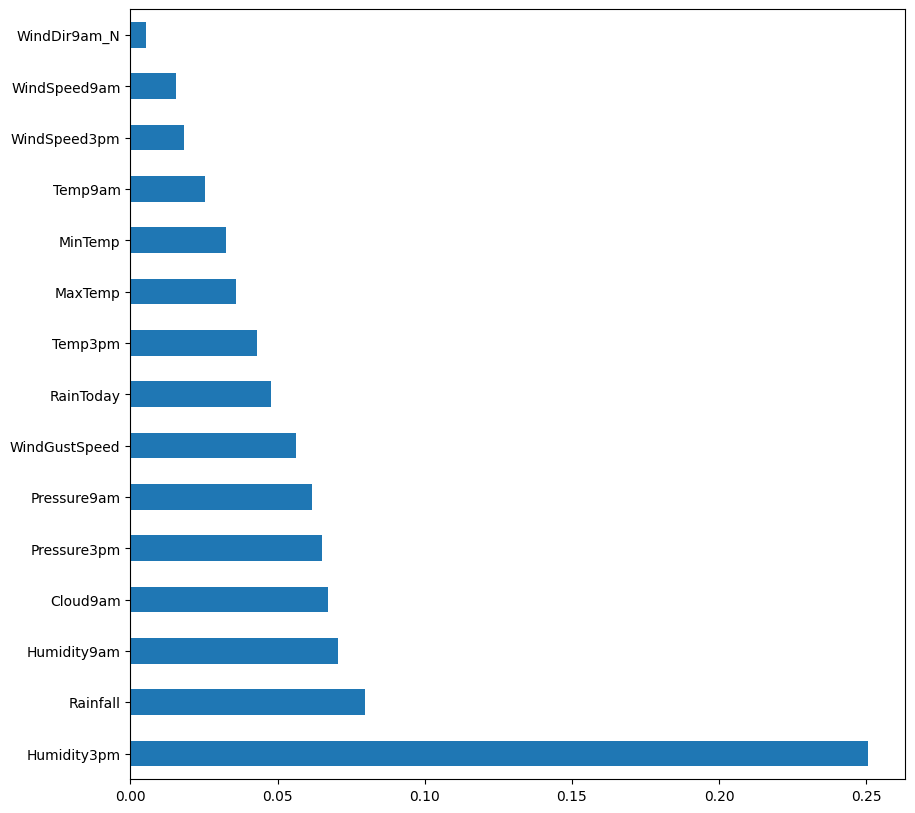

In [82]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(rf_best_param.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')